In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
# importing libraries to plot the wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [2]:
# specify path where the chrome extension on local system has installed
driver = webdriver.Chrome("C:\\Users\\hi\\Downloads\\chromedriver_win32\\chromedriver.exe")

In [3]:

position = "Data Scientist"
location = "Germany"
# formating to linkedin model
position = position.replace(' ', "%20")

# change email and password to your linkedin email and password
email = "email"
password = "password"


# Opening linkedin website
driver.get('https://www.linkedin.com/jobs')

In [4]:
username = driver.find_element(By.ID,'session_key').send_keys(email)

password=driver.find_element(By.ID,'session_password').send_keys(password)



In [5]:
sign_in = driver.find_element(By.CSS_SELECTOR, "button[type='submit']").click()

In [6]:
message_box = driver.find_element(By.CLASS_NAME, "msg-overlay-bubble-header").click()

In [7]:
driver.get(f"https://www.linkedin.com/jobs/search/?currentJobId=3253584772&f_E=2&geoId=101282230&keywords={position}&location={location}")


In [8]:
driver.find_element(By.CLASS_NAME, 'jobs-search-results-list')

<selenium.webdriver.remote.webelement.WebElement (session="175ebf9d94a820c6133c821da6cd96b5", element="7854810c-7f34-4e65-bc89-f71ca1737859")>

In [9]:
jobs_per_page = driver.find_element(By.CLASS_NAME, 'scaffold-layout__list-container')
jobs_count_page = jobs_per_page.find_elements(By.CLASS_NAME, 'jobs-search-results__list-item')

In [10]:
for i in range(1,len(jobs_count_page)+2):
    i= i+1
    print(i)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


Let's create a loop so that it will click each and every job and we can see its job description

In [11]:
job_role=[]
job_location=[]
job_details = []
#job_date=[]
#job_level=[]
company_name=[]
#company_description=[]
#company_type=[]

# getting information from all the pages
for i in range(1,41):
    
    job_count = driver.find_element(By.CSS_SELECTOR, f"button[aria-label='Page {i}']").click()
    jobs_per_page = driver.find_element(By.CLASS_NAME, 'scaffold-layout__list-container')
    jobs_count_page = jobs_per_page.find_elements(By.CLASS_NAME, 'jobs-search-results__list-item')
    
# click all jobs
    for i in range(1,len(jobs_count_page)+1):
        driver.find_element(By.XPATH, f'/html/body/div[6]/div[3]/div[4]/div/div/main/div/section[1]/div/ul/li[{i}]').click()
        
        
        #job_role
        job_r= driver.find_element(By.CLASS_NAME, f'jobs-unified-top-card__job-title')
        soup_r = BeautifulSoup(job_r.get_attribute('outerHTML'), 'html.parser') # get text
        job_role.append(soup_r.text)
        
        #company_name
        comp_name= driver.find_element(By.CLASS_NAME, 'job-card-container__company-name')
        soup_com_n = BeautifulSoup(comp_name.get_attribute('outerHTML'), 'html.parser') # get text
        company_name.append(soup_com_n.text)
        
        #job_location
        job_l= driver.find_element(By.CLASS_NAME, f'job-card-container__metadata-item')
        soup_l = BeautifulSoup(job_l.get_attribute('outerHTML'), 'html.parser') # get text
        job_location.append(soup_l.text)
        
        #job_type
        #job_lev= driver.find_element(By.CLASS_NAME, f'')
        #soup_level = BeautifulSoup(job_lev.get_attribute('outerHTML'), 'html.parser') # get text
        #job_level.append(soup_level.text)
        
        
        #job_description
        job_desc = driver.find_element(By.CLASS_NAME, f'jobs-description__container.m4')
        soup = BeautifulSoup(job_desc.get_attribute('outerHTML'), 'html.parser') # get text
        job_details.append(soup.text) # add text to list
        
        
        #company_description
        
        #comp_des= driver.find_element(By.CLASS_NAME, f'inline-show-more-text')
        #soup_comp_des = BeautifulSoup(comp_des.get_attribute('outerHTML'), 'html.parser') # get text
        #company_description.append(soup_comp_des.text)
        
        #company_TYPE
        #comp_t= driver.find_element(By.CLASS_NAME, f't-14.mt5')
        #soup_comp_t = BeautifulSoup(comp_t.get_attribute('outerHTML'), 'html.parser') # get text
        #company_type.append(soup_comp_t.text)
        
        
      

In [12]:
jobs_df = pd.DataFrame(
    {"job_role": job_role,
     "job_location": job_location,
     "job_details":job_details,
     #"job_date": job_date,
     #"job_level": job_level,
     "company_name":company_name,
     #"company_description":company_description,
     #"company_type":company_type
    }
)

In [13]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_role      999 non-null    object
 1   job_location  999 non-null    object
 2   job_details   999 non-null    object
 3   company_name  999 non-null    object
dtypes: object(4)
memory usage: 31.3+ KB


In [14]:
jobs_df['job_details']= jobs_df.job_details.drop_duplicates(keep='first')


In [15]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_role      999 non-null    object
 1   job_location  999 non-null    object
 2   job_details   192 non-null    object
 3   company_name  999 non-null    object
dtypes: object(4)
memory usage: 31.3+ KB


In [16]:
jobs_df = jobs_df.dropna()

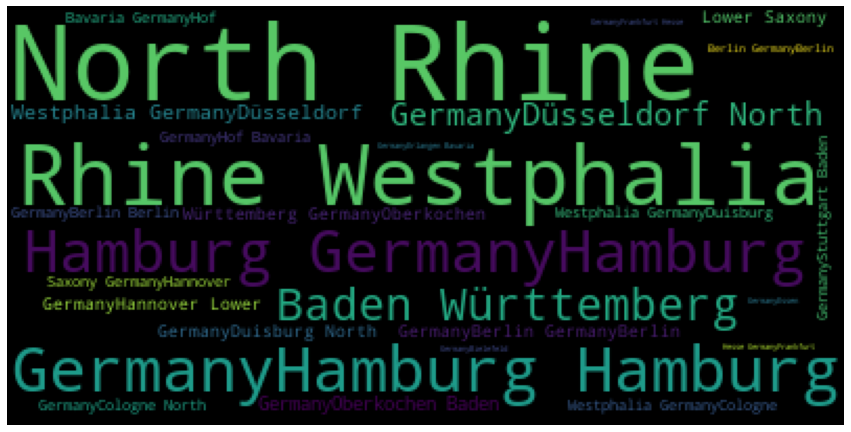

In [17]:
# plot parameters
wordcloud = WordCloud(background_color='black',
                      #stopwords=stopwords,
                      max_words=500,
                      max_font_size=50,
                      random_state=42).generate("".join(jobs_df["job_location"]))

# Plot
print(wordcloud)
plt.figure(figsize=(15, 10))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

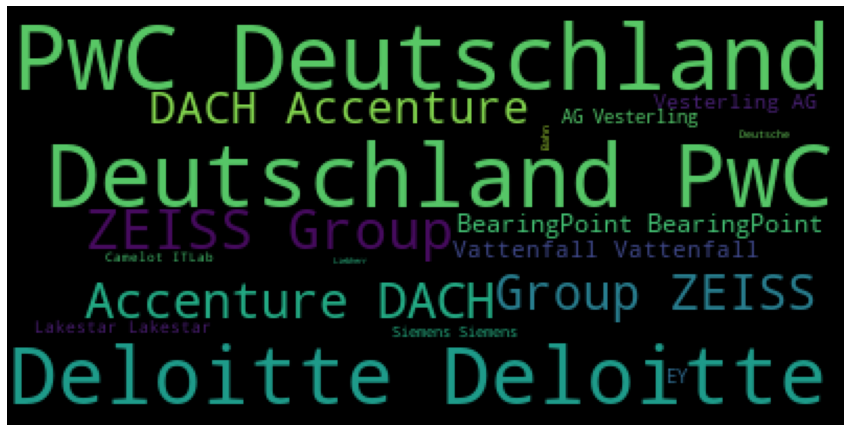

In [18]:
# plot parameters
wordcloud = WordCloud(background_color='black',
                      #stopwords=stopwords,
                      max_words=500,
                      max_font_size=50,
                      random_state=42).generate("".join(jobs_df["company_name"]))

# Plot
print(wordcloud)
plt.figure(figsize=(15, 10))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
jobs_df= jobs_df.replace('\n', '', regex=True)


In [22]:
jobs_df

,job_role,job_location,job_details,company_name
0,Consultant (m/w/d) Quant Finanzinstrumente: Be...,"Hamburg, Hamburg, Germany",Du machst den Unterschied. Ob im Business Aud...,Deloitte
1,Junior Consultant SAP Data Intelligence (f/m/d),"Hamburg, Hamburg, Germany",,Deloitte
2,Entwicklungsingenieur Mechatronik (m/w/x),"Hamburg, Hamburg, Germany",Ihre Rolledie Entwicklung von Komponenten und...,Deloitte
3,Consultant Data Analytics - Consulting (Financ...,"Hamburg, Hamburg, Germany","Das erwartet dich bei uns – Erfahrungen, von ...",Deloitte
4,Data Scientist (m/f/d) Remote Option,"Hamburg, Hamburg, Germany","Location: Nürnberg, DE, 90411Job Requisition ...",Deloitte
...,...,...,...,...
970,Technical Consultant (m/w/d),"Hamburg, Hamburg, Germany",TOPdesk ist ein internationales Softwareunter...,Deloitte
971,Software Developer (m/w/d),"Hamburg, Hamburg, Germany","Work @ XPLM„Expert Integration“ heißt, dass w...",Deloitte
972,Software Developer (m/f/d),"Hamburg, Hamburg, Germany",Location: WilsdruffType(s) of employment: Ful...,Deloitte
974,Werkstudent Projektmanagement in der Elektromo...,"Munich, Bavaria, Germany","Du suchst das Besondere, das ...",Accenture DACH


jobs_df.to_csv('linkedin_ds_jobs.csv')